In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv("cardio_train.csv",sep=';')

In [22]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [23]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [92]:
df = data.copy()

In [93]:
df.drop("id",axis=1,inplace=True)

In [94]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [95]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [96]:
df['age'] = df['age']/365

In [99]:
df['age'] = df['age'].astype(int) 

In [111]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [112]:
from sklearn.model_selection import train_test_split
X = df.drop(['cardio'],axis=1)
Y = df['cardio']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [113]:
X_train.shape

(56000, 11)

In [114]:
y_train.shape

(56000,)

In [115]:
X_test.shape

(14000, 11)

In [116]:
y_test.shape

(14000,)

In [117]:
#ANN
import tensorflow as tf
from tensorflow import keras

In [144]:
model = keras.models.Sequential()
activation = 'relu'
model.add(keras.layers.Flatten(input_shape=[11]))
model.add(keras.layers.Dense(11,activation=activation))
model.add(keras.layers.Dense(6,activation=activation))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [145]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 11)                0         
                                                                 
 dense_47 (Dense)            (None, 11)                132       
                                                                 
 dense_48 (Dense)            (None, 6)                 72        
                                                                 
 dense_49 (Dense)            (None, 1)                 7         
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [146]:
model.compile(loss="BinaryCrossentropy",optimizer="adam",metrics=["accuracy"])

In [147]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 30)

Epoch 1/30
1750/1750 [==============================] - 4s 1ms/step - loss: 0.6534 - accuracy: 0.6531 - val_loss: 0.6073 - val_accuracy: 0.6831
Epoch 2/30
1750/1750 [==============================] - 2s 1ms/step - loss: 0.6012 - accuracy: 0.6947 - val_loss: 0.5958 - val_accuracy: 0.6968
Epoch 3/30
1750/1750 [==============================] - 2s 1ms/step - loss: 0.5927 - accuracy: 0.6993 - val_loss: 0.5915 - val_accuracy: 0.7030
Epoch 4/30
1750/1750 [==============================] - 2s 1ms/step - loss: 0.5906 - accuracy: 0.7011 - val_loss: 0.5865 - val_accuracy: 0.7041
Epoch 5/30
1750/1750 [==============================] - 2s 1ms/step - loss: 0.5887 - accuracy: 0.7037 - val_loss: 0.5845 - val_accuracy: 0.7073
Epoch 6/30
1750/1750 [==============================] - 2s 1ms/step - loss: 0.5875 - accuracy: 0.7031 - val_loss: 0.5831 - val_accuracy: 0.7066
Epoch 7/30
1750/1750 [==============================] - 2s 1ms/step - loss: 0.5868 - accuracy: 0.7042 - val_loss: 0.5821 - val_accuracy:

438/438 [==============================] - 0s 597us/step
accuracy : 0.7093571428571429
precision : 0.7718521370812476
recall : 0.5816045263310605


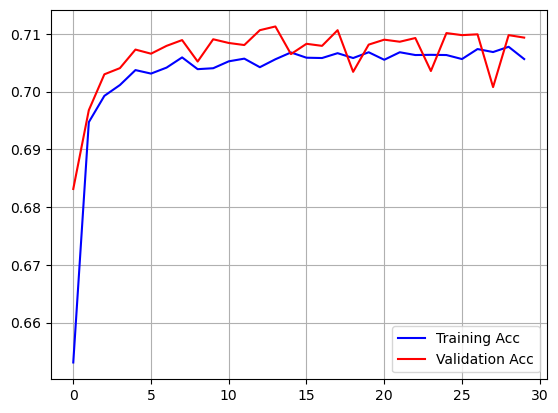

In [163]:
plt.plot(history.history["accuracy"],c='b')
plt.plot(history.history["val_accuracy"],c='r')
plt.grid()
plt.legend(["Training Acc","Validation Acc"])

import sklearn.metrics as metrics
y_pred = model.predict(X_test)
#print(y_pred)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

acc = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)

print(f'accuracy : {acc}')
print(f'precision : {precision}')
print(f'recall : {recall}')

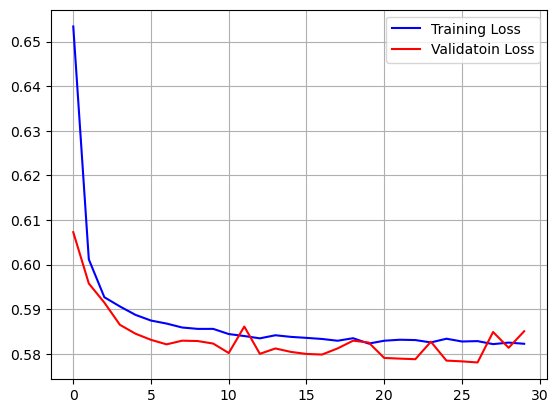

In [149]:
plt.plot(history.history['loss'],c = "b")
plt.plot(history.history["val_loss"],c ="r")
plt.grid()
plt.legend(["Training Loss","Validatoin Loss"])